#### 5) Final Results and Training Histories

As we have discussed, during the course of the training procedure the results of all trained agents in "test_mode" are written out and stored, as well as the results from the best agent at each error rate. However, in order to ease computational time during training, each agent was only benchmarked for 100 episodes. 

Here we present the full results and training histories for each best performing agent, as selected by the preliminary benchmarking during training. In particular, these full results were obtained by testing each best performing trained agent, at each error rate, for the number of episodes that guaranteed at least 10^6 syndromes were seen by the agent. All the trained agents from which these results were obtained, along with the fully detailed results (i.e. episode length of every single tested episode at each error rate for each agent), can be found in the "trained_models" directory of the repo. In addition to these evaluation results, we also provide the learning curves for all best performing agents.

##### 5a) Results

We begin by showing the results of full evaluations. In particular, we start by importing all necessary packages:

In [1]:
import os
import matplotlib as mpl
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
import json
from cycler import cycler

rcparams = {                      
    "pgf.texsystem": "pdflatex",        
    "text.usetex": True,               
    "font.family": "Latin Modern Roman",
    "font.serif": [],                   
    "font.sans-serif": [],
    "font.monospace": [],          
    "font.size": 12,
    "legend.fontsize": 12,         
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    
        r"\usepackage[T1]{fontenc}",        
        ]
}
mpl.rcParams.update(rcparams)

We now need to define some helper functions to allow us to extract the results:

In [2]:
cwd = os.getcwd()
ordered_keys = ["0.001","0.002","0.003","0.004","0.005","0.006","0.007","0.008",
                "0.009","0.01","0.011","0.012","0.013", "0.014","0.015"]
variable_keys = ["exploration_fraction", "max_eps", "final_eps", "learning_rate", "target_network_update_freq"]

def dict_to_list(the_dict, ordered_keys):
    output_list = []
    for key in ordered_keys:
        if key in the_dict.keys():
            output_list.append(the_dict[key])
    return output_list

def config_dict_to_string(config_dict, variable_keys):
    base_string = "["
    end = len(variable_keys)
    count = 1
    for key in variable_keys:
        if key in config_dict.keys():
            if count < end:
                if key == "exploration_fraction":
                    if config_dict[key] == 100000:
                        base_string = base_string+"1e5, "
                    else:
                        base_string = base_string+"2e5, "
                else:
                    base_string = base_string+str(config_dict[key])+", "
            else:
                base_string = base_string+str(config_dict[key])+"]"
            count +=1
    return base_string

And now we can extract and format the results, both from the bitflip and depolarising noise simulations:

In [3]:
x_folder = os.path.join(cwd,"../trained_models/d5_x/")
x_results_dict = {}
x_training_dict = {}
x_configs_dict = {}

for direct in os.listdir(x_folder):
    if "fixed_config" not in direct:
        path_to_results = os.path.join(x_folder,direct+"/all_results.p")
        path_to_training_history = os.path.join(x_folder,direct+"/training_history.json")

        x_results_dict[direct] = pickle.load( open(path_to_results, "rb" ))
        with open(path_to_training_history) as f:
            history = json.load(f)
        x_training_dict[direct] = history["episode_lifetimes_rolling_avg"]
        
        err_direct = os.path.join(x_folder,direct)
        for f in os.listdir(err_direct):
            if "variable_config" in f:
                path_to_config = os.path.join(err_direct,f)
        x_configs_dict[direct] = config_dict_to_string(pickle.load( open(path_to_config, "rb" )),variable_keys)
        
        
        
ordered_x_results = {}

for key in x_results_dict.keys():
    ordered_x_results[key] = dict_to_list(x_results_dict[key], ordered_keys)

In [4]:
dp_folder = os.path.join(cwd,"../trained_models/d5_dp/")
dp_results_dict = {}
dp_training_dict = {}
dp_configs_dict = {}

for direct in os.listdir(dp_folder):
    if "fixed_config" not in direct:
        path_to_results = os.path.join(dp_folder,direct+"/all_results.p")
        path_to_training_history = os.path.join(dp_folder,direct+"/training_history.json")

        dp_results_dict[direct] = pickle.load( open(path_to_results, "rb" ))
        with open(path_to_training_history) as f:
            history = json.load(f)
        dp_training_dict[direct] = history["episode_lifetimes_rolling_avg"]
        
        err_direct = os.path.join(dp_folder,direct)
        for f in os.listdir(err_direct):
            if "variable_config" in f:
                path_to_config = os.path.join(err_direct,f)
        dp_configs_dict[direct] = config_dict_to_string(pickle.load( open(path_to_config, "rb" )),variable_keys)
        
        
        
ordered_dp_results = {}

for key in dp_results_dict.keys():
    ordered_dp_results[key] = dict_to_list(dp_results_dict[key], ordered_keys)

Finally, we can plot the results:

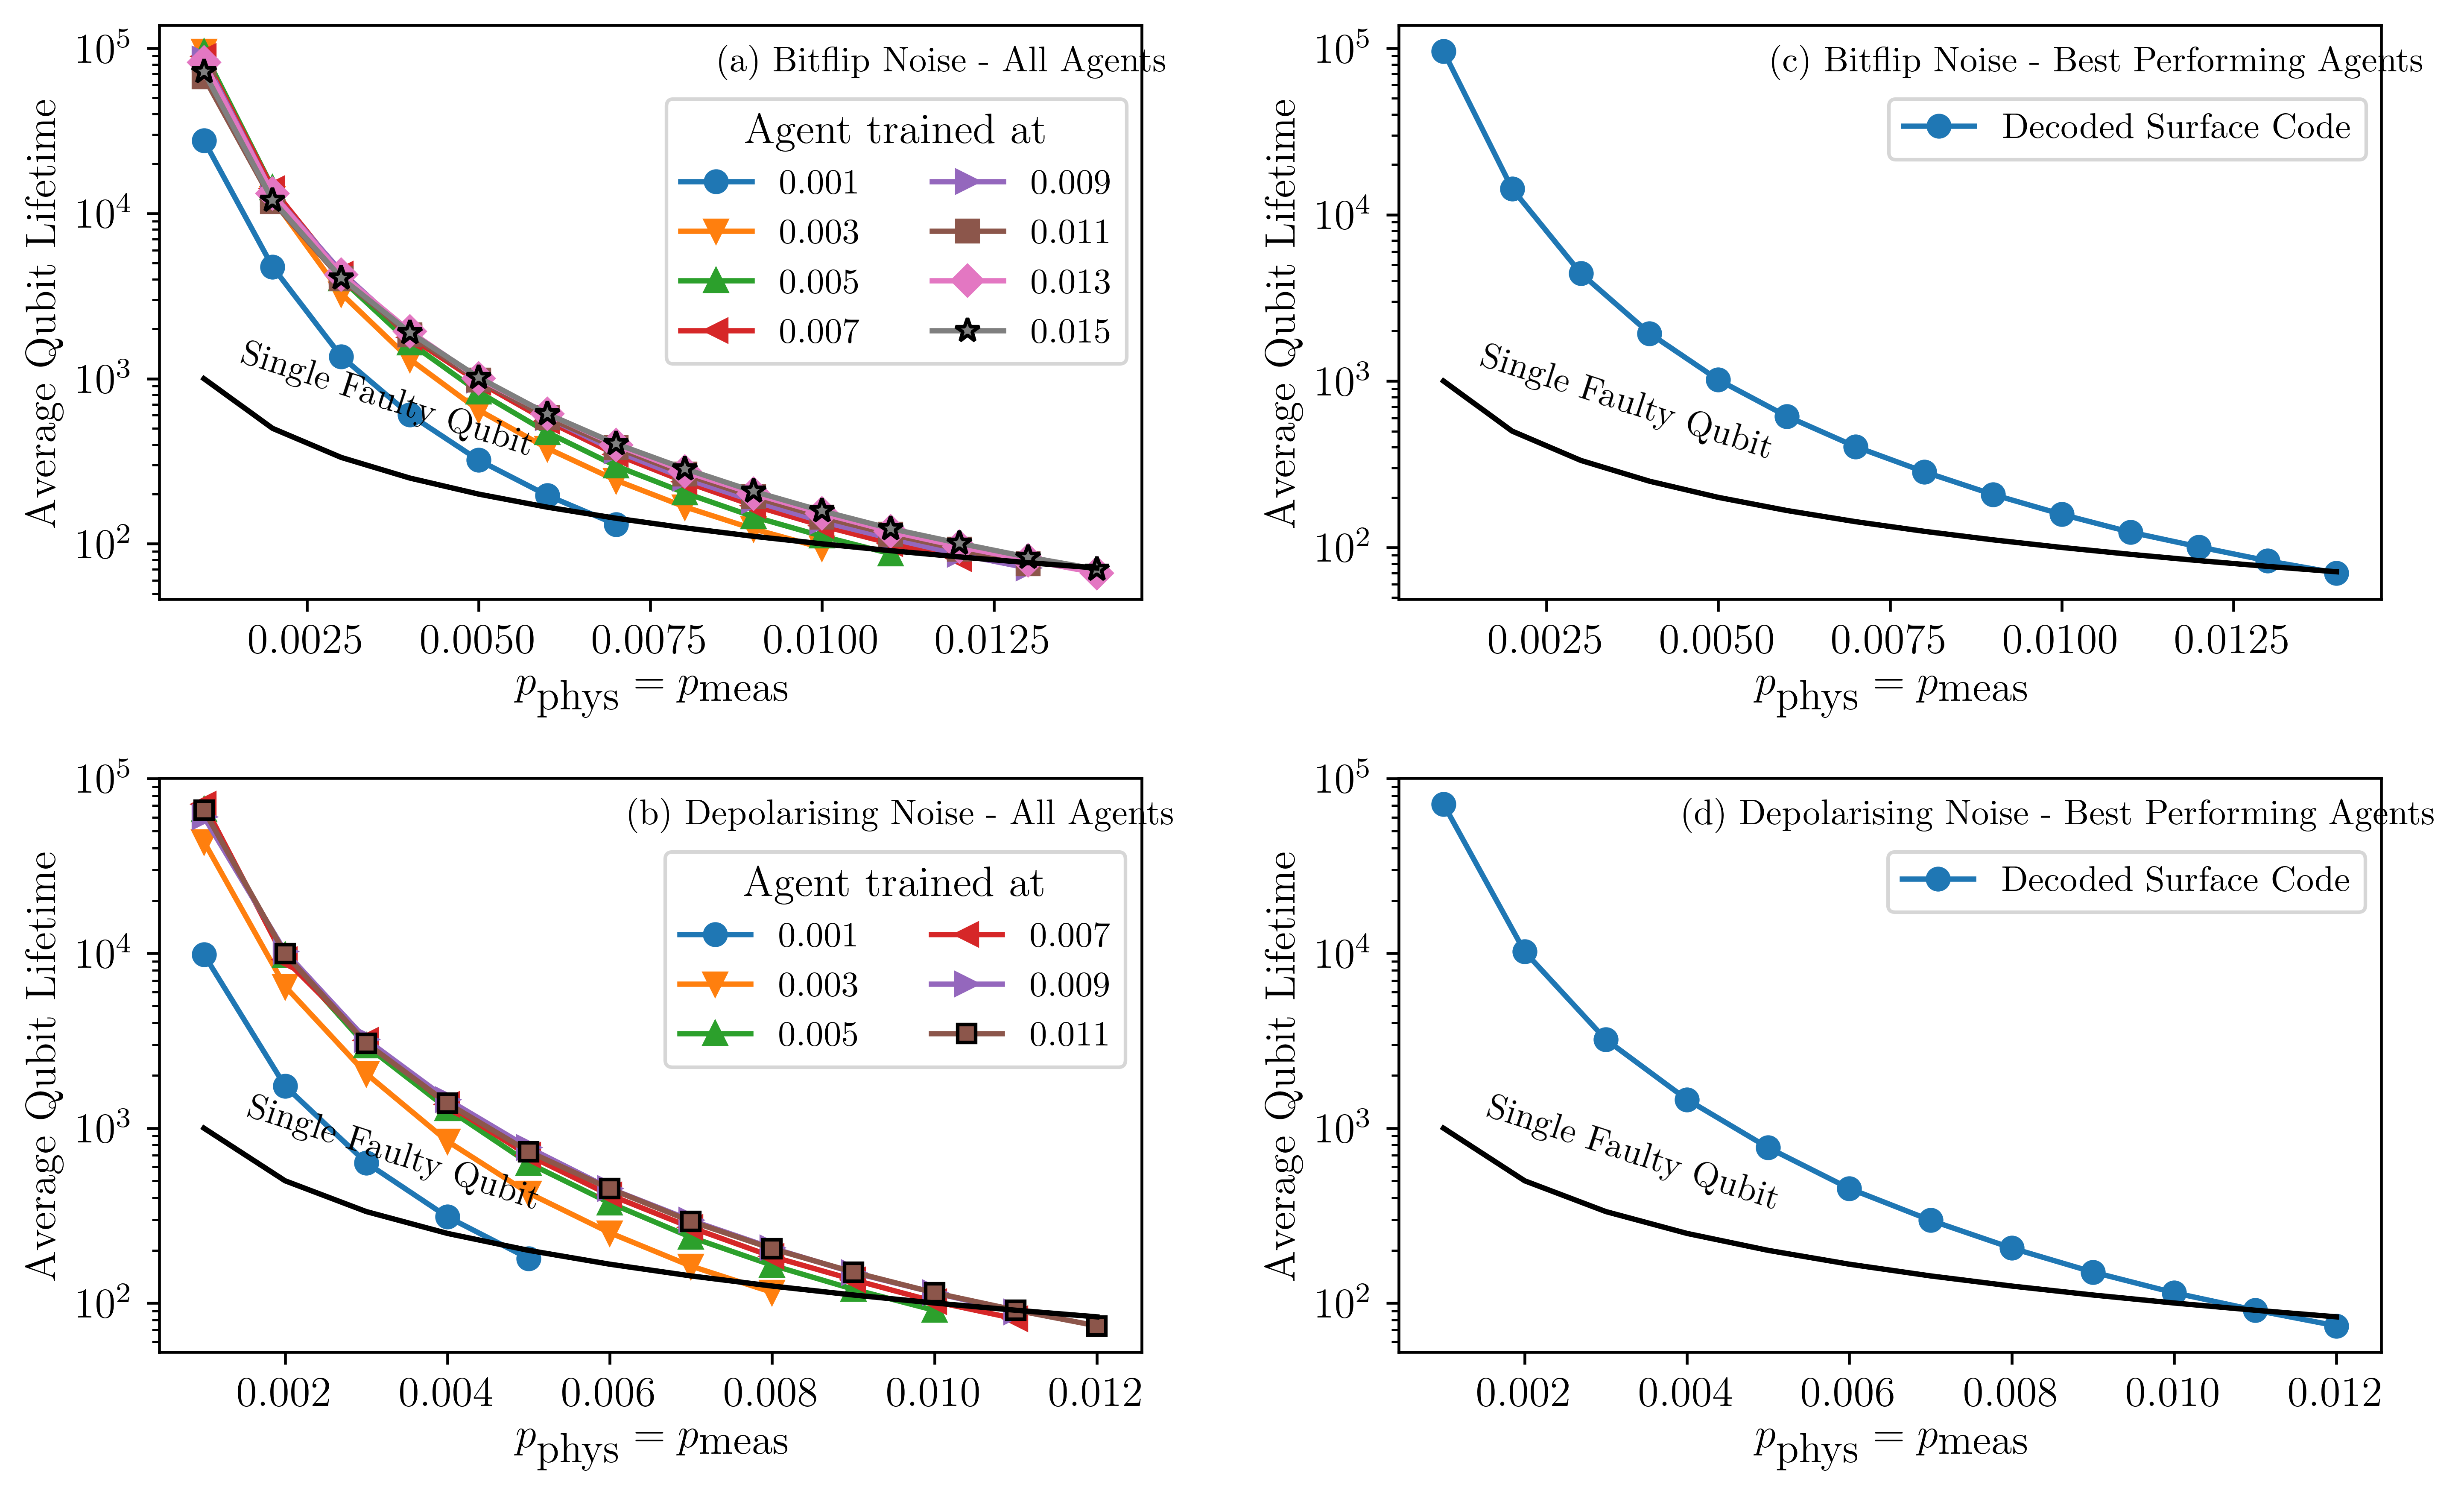

In [5]:
fig, ax = plt.subplots(2,2,dpi=600,figsize=(10,6))

markers = ["o","v","^","<",">","s","D","*"]
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

custom_colors=["#42bcf4", "#f4c441", "#41f45b", "#4197f4", "#f44141", "#dcf441"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=custom_colors)

#---------------------------------------------------------------------------------
#
# Bitflip noise - All agents
#
#---------------------------------------------------------------------------------
count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_x_results.keys():
        if max_l < len(ordered_x_results[key]):
            max_l = len(ordered_x_results[key])
        if( key != "0.015" ):
            #ax.plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, markeredgecolor='k', markeredgewidth=0.5, label="$%s$"%key)
            ax[0,0].plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, label="$%s$"%key)
        else:
            ax[0,0].plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=7, markeredgecolor='k', label="$%s$"%key)
        count += 1
                        
ax[0,0].plot(p_phys[:max_l],bench[:max_l],"k")#,label="Single \n Faulty Qubit")
ax[0,0].text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax[0,0].text(0.57, 0.92, "(a) Bitflip Noise - All Agents", fontsize=10,transform=ax[0,0].transAxes)
ax[0,0].set_yscale('log')

ax[0,0].set_ylabel("Average Qubit Lifetime")
ax[0,0].set_xlabel("$p_{\\textrm{phys}} = p_{\\textrm{meas}}$")
ax[0,0].legend(fancybox=True, ncol=2, title="Agent trained at", bbox_to_anchor=(0.003, 0.8,1., .102),fontsize=10)
#ax[0,0].legend(fancybox=True, ncol=2, title="Agent trained at", bbox_to_anchor=(0.003, 0.33, 1., .102))


#---------------------------------------------------------------------------------
#
# Bitflip noise - Best agent
#
#---------------------------------------------------------------------------------
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_x_results.keys():
            if len(ordered_x_results[agent]) >= j+1:
                if ordered_x_results[agent][j] > benchmark:
                    benchmark = ordered_x_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

ax[0,1].plot(p_phys[:len(best_results)], best_results, '-o', label="Decoded Surface Code")

ax[0,1].plot(p_phys[:len(best_results)],bench[:len(best_results)],"k")
ax[0,1].text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax[0,1].text(0.38, 0.92, "(c) Bitflip Noise - Best Performing Agents", fontsize=10,transform=ax[0,1].transAxes)
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel("Average Qubit Lifetime")
ax[0,1].set_xlabel("$p_{\\textrm{phys}} = p_{\\textrm{meas}}$")
ax[0,1].legend(fancybox=True,bbox_to_anchor=(0.003, 0.8,1., .102),fontsize=10)




#---------------------------------------------------------------------------------
#
# Depolarizing noise - All agents
#
#---------------------------------------------------------------------------------
p_phys = [j*0.001 for j in range(1,20)]
bench = [1/p for p in p_phys]

count = 0
max_l = 0
for key in ordered_keys:
    if key in ordered_dp_results.keys():
        if max_l < len(ordered_dp_results[key]):
            max_l = len(ordered_dp_results[key])
        if( key != "0.011" ):
            #ax.plot(p_phys[:len(ordered_x_results[key])],ordered_x_results[key], marker=markers[count], markersize=6, markeredgecolor='k', markeredgewidth=0.5, label="$%s$"%key)
            ax[1,0].plot(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key], marker=markers[count], markersize=6, label="$%s$"%key)
        else:
            ax[1,0].plot(p_phys[:len(ordered_dp_results[key])],ordered_dp_results[key], marker=markers[count], markersize=5, markeredgecolor='k', label="$%s$"%key)
        count += 1
                        
ax[1,0].plot(p_phys[:max_l],bench[:max_l],"k")#,label="Single \n Faulty Qubit")
ax[1,0].text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax[1,0].text(0.478, 0.92, "(b) Depolarising Noise - All Agents", fontsize=10,transform=ax[1,0].transAxes)

ax[1,0].set_yscale('log')
ax[1,0].set_ylabel("Average Qubit Lifetime")
ax[1,0].set_xlabel("$p_{\\textrm{phys}} = p_{\\textrm{meas}}$")
ax[1,0].legend(fancybox=True, ncol=2, title="Agent trained at",fontsize=10,bbox_to_anchor=(0.002, 0.8, 1., .102))


#---------------------------------------------------------------------------------
#
# Depolarizing noise - Best agents
#
#---------------------------------------------------------------------------------
best_results = []
for j in range(20):
    benchmark = 0
    for agent in ordered_keys:
        if agent in ordered_dp_results.keys():
            if len(ordered_dp_results[agent]) >= j+1:
                if ordered_dp_results[agent][j] > benchmark:
                    benchmark = ordered_dp_results[agent][j]
    best_results.append(benchmark)
                
first_zero = best_results.index(0)
best_results = best_results[:first_zero]

ax[1,1].plot(p_phys[:len(best_results)], best_results, '-o', label="Decoded Surface Code")
ax[1,1].plot(p_phys[:len(best_results)],bench[:len(best_results)],"k")
ax[1,1].set_yscale('log')

ax[1,1].text(0.0015, 340, "Single Faulty Qubit", rotation=-18, fontsize=10)
ax[1,1].text(0.29, 0.92, "(d) Depolarising Noise - Best Performing Agents", fontsize=10,transform=ax[1,1].transAxes)
    
ax[1,1].set_ylabel("Average Qubit Lifetime")
ax[1,1].set_xlabel("$p_{\\textrm{phys}} = p_{\\textrm{meas}}$")
ax[1,1].legend(fancybox=True,fontsize=10,bbox_to_anchor=(0.002, 0.8, 1., .102))

fig.tight_layout()
#fig.savefig("./Images/final_results.pdf", bbox_inches='tight')

As discussed in the associated paper, from the above figures one can see that for bitflip (depolarising) noise, as long as the error rate is below 0.013 (0.011), there exists a decoding agent for which the average lifetime of a decoded logical qubit is longer than the average lifetime of a single faulty qubit.

##### 5a) Training Histories

It is also of interest to examine the learning curves of all best performing agents. As such, we display these below, again for both bitflip and depolarising noise. For each best performing agent, we also provide the associated hyperparameters at which that agent was obtained, given as a list [num_exploration_steps, initial_epsilon, final_epsilon, learning_rate, target_network_update_frequency].

We start by showing the results for bitflip noise:

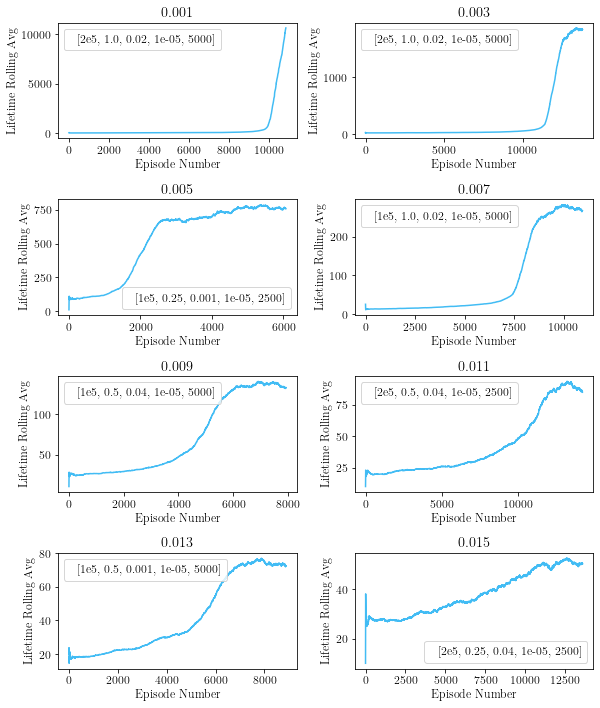

In [6]:
plt.figure(figsize=(8.5,10))
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011","0.013", "0.015"]
count = 1
for key in trained_keys:
    plt.subplot(4, 2,count)
    plt.plot(x_training_dict[key],label = x_configs_dict[key] )
    plt.title(key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    plt.legend(handlelength=0,)
    count +=1
    

plt.tight_layout()
#plt.savefig("./Images/bitflip_training")
plt.show()

And then for depolarising noise:

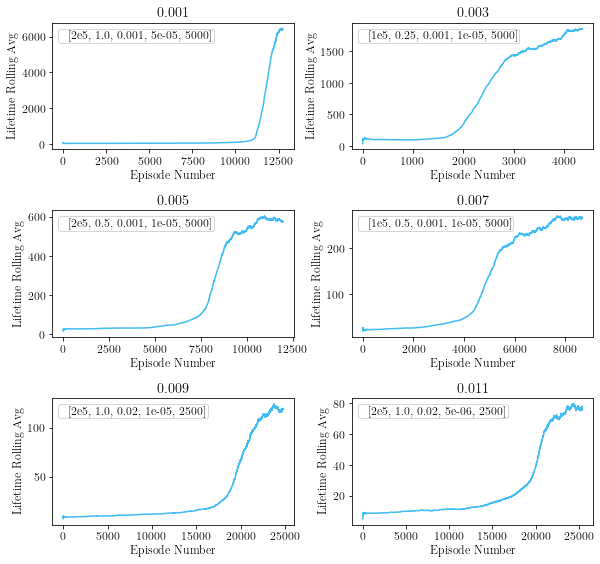

In [7]:
plt.figure(figsize=(8.5,8))
trained_keys = ["0.001","0.003","0.005","0.007","0.009","0.011"]
count = 1
for key in trained_keys:
    plt.subplot(3, 2,count)
    plt.plot(dp_training_dict[key],label = dp_configs_dict[key] )
    plt.title(key)
    plt.xlabel("Episode Number")
    plt.ylabel("Lifetime Rolling Avg")
    #plt.legend(handlelength=0,loc="upper left",framealpha=1)
    plt.legend(handlelength=0,loc="upper left",borderpad=0.1)
    count +=1
    

plt.tight_layout()
#plt.savefig("./Images/depolarising_training")
plt.show()